In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


In [17]:
# 读取classname.csv

class_name=[]# 用于存放classname.csv中各单元格的内容
with open("undergraduate_dataset_classname.csv",'r',encoding='utf-8-sig') as f:
    #需使用utf-8-sig编码，否则会出现第一行出现['\ufeff114', '27']
    classname_lines=f.readlines()
    for line in classname_lines:
        cell=line.strip('\n').split(',')[:-1]
        line_list=list(filter(None, cell))# 过滤掉空白单元格,再转化为list
        class_name.append(line_list)
    print(class_name)
    column_name=class_name[1]# class_name中第二个列表为数据各列的列名

data=pd.read_csv('undergraduate_dataset.csv',header=0)



[['114', '27'], ['Year', 'Gender', 'Province', 'Height', 'Weight', 'Unavailable', 'Shortsight', 'Dailymealexp', 'Riceexp', 'Monthlyexp', 'Weeklytakeout', 'Monthlyshopping', 'Sleeptime', 'Timefallasleep', 'Dailyslidetime', 'Dailygametime', 'Dailysporttime', 'Weeklyfamilyfreq', 'Weeklyhairwash', 'Healthstatus', 'Hairloss', 'Dailyselfstudy', 'Selfstudyplace', 'Lessoneffect', 'Weelyworktime', 'Anxiousstatus', 'Rank'], ['男', '女'], ['北京市', '天津市', '山西省', '河北省', '内蒙古自治区', '黑龙江省', '吉林省', '辽宁省', '上海市', '江苏省', '浙江省', '安徽省', '福建省', '江西省', '山东省', '河南省', '湖北省', '湖南省', '广东省', '广西壮族自治区', '海南省', '四川省', '贵州省', '云南省', '重庆市', '西藏自治区', '陕西省', '甘肃省', '青海省', '宁夏回族自治区', '新疆维吾尔自治区', '香港特别行政区', '澳门特别行政区', '台湾省'], ['否', '是'], ['22:00以前', '22:00~22:30', '22:30~23:00', '23:00~23:30', '23:30~00:00', '00:00~00:30', '00:30~01:00', '01:00~01:30', '01:30~02:00', '02:00以后'], ['非常好', '比较好', '一般', '较差', '很差'], ['不脱发', '微微脱发', '较严重脱发', '严重脱发'], ['图书馆', '寝室', '教室', '其他'], ['不焦虑', '稍有焦虑', '较严重焦虑', '严重焦虑'], ['前10%', '10%~20%'

In [18]:
# 生成各列类的字典
class_name_dict={}
for i in range(2,len(class_name)):
    for j in range(len(class_name[i])):
        class_name_dict[class_name[i][j]] = j
print(class_name_dict)


{'男': 0, '女': 1, '北京市': 0, '天津市': 1, '山西省': 2, '河北省': 3, '内蒙古自治区': 4, '黑龙江省': 5, '吉林省': 6, '辽宁省': 7, '上海市': 8, '江苏省': 9, '浙江省': 10, '安徽省': 11, '福建省': 12, '江西省': 13, '山东省': 14, '河南省': 15, '湖北省': 16, '湖南省': 17, '广东省': 18, '广西壮族自治区': 19, '海南省': 20, '四川省': 21, '贵州省': 22, '云南省': 23, '重庆市': 24, '西藏自治区': 25, '陕西省': 26, '甘肃省': 27, '青海省': 28, '宁夏回族自治区': 29, '新疆维吾尔自治区': 30, '香港特别行政区': 31, '澳门特别行政区': 32, '台湾省': 33, '否': 0, '是': 1, '22:00以前': 0, '22:00~22:30': 1, '22:30~23:00': 2, '23:00~23:30': 3, '23:30~00:00': 4, '00:00~00:30': 5, '00:30~01:00': 6, '01:00~01:30': 7, '01:30~02:00': 8, '02:00以后': 9, '非常好': 0, '比较好': 1, '一般': 2, '较差': 3, '很差': 4, '不脱发': 0, '微微脱发': 1, '较严重脱发': 2, '严重脱发': 3, '图书馆': 0, '寝室': 1, '教室': 2, '其他': 3, '不焦虑': 0, '稍有焦虑': 1, '较严重焦虑': 2, '严重焦虑': 3, '前10%': 0, '10%~20%': 1, '20%~30%': 2, '30%~40%': 3, '40%~50%': 4, '50%~60%': 5, '60%~70%': 6, '70%~80%': 7, '80%~90%': 8, '90%以后': 9}


In [19]:
# 将地域信息更改为以地区分类，1x为北方地区，2x为东北地区，
# 3x东部地区，4x为中部地区，5x为西南地区，6x为西北地区，
# 具体可查看province.txt文件，与身份证开头数字一致
province_dict={}
with open('province.txt','r',encoding='utf-8') as f:
    lines=f.readlines()
    # print(lines)
    for line in lines:
        line=line.strip('\n').split('\t')
        # print(line)
        class_name_dict[line[0]] = eval(line[1])

In [20]:
# 根据
def trans(x):
    if type(x)==str:
        return class_name_dict[x]
    else:
        return x

data= data.map(trans)
data.columns=column_name

In [21]:
print(data.head())

   Year  Gender  Province  Height  Weight  Unavailable  Shortsight  \
0  2023       0        37   178.0    80.0            0       550.0   
1  2023       0        51   173.0    62.0            0       100.0   
2  2023       0        43   165.0    60.0            0       500.0   
3  2023       0        33   180.0    75.0            0         0.0   
4  2023       0        61   179.0    75.0            0       280.0   

   Dailymealexp  Riceexp  Monthlyexp  ...  Weeklyfamilyfreq  Weeklyhairwash  \
0            60      0.7        2000  ...               4.0             5.0   
1            80      0.5        3000  ...               0.0             6.0   
2            30      0.5        2000  ...               1.0             4.0   
3            30      1.0        2000  ...               2.0             6.0   
4            35      0.8        2200  ...               1.0             7.0   

   Healthstatus  Hairloss  Dailyselfstudy  Selfstudyplace  Lessoneffect  \
0             0         0    

In [22]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
print(type(X),type(y))
print(X.shape,y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(114, 26) (114,)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(91, 26) (91,) (23, 26) (23,)


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
model=Pipeline(
    ("")
)

In [25]:
print(data.shape)

(114, 27)


In [26]:
BMI=data.Weight/(data.Height/100)**2
data['BMI']=BMI
print(data.shape)

(114, 28)


In [27]:
X=pd.concat([data.Province,data.Dailymealexp,data.Dailysporttime],axis=1)
y=data.BMI

(91, 3) (91,) (23, 3) (23,)


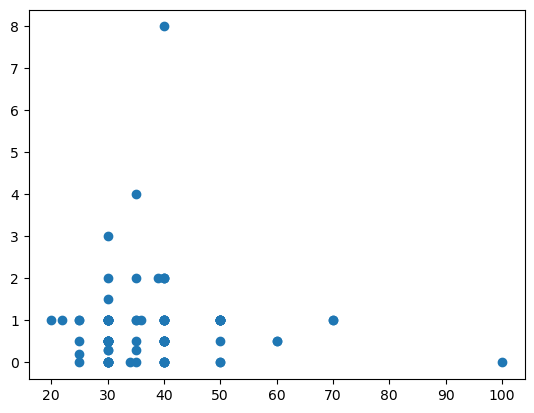

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)
X_train=X_train.values
plt.scatter(X_train[:,1],X_train[:,2])

In [29]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

C:\Users\1806476094\.conda\envs\test\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-0.7631307692105256

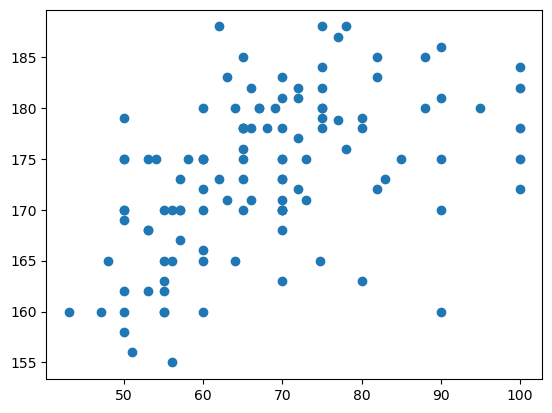

In [30]:
plt.scatter(data.Weight.values,data.Height.values)
# plt.scatter(data.Province.values,data.Dailymealexp.values)
plt.show()